In [57]:
from datetime import datetime, timedelta
from events import Events
import pandas as pd

events = Events()

df = pd.DataFrame(events.events,columns=["week", "category", "subject", "duration"])
df = df.loc[df.week != "Before"]
df['duration_mins'] = df.duration.apply(lambda t: t.seconds//60)
df['duration_hours'] = df.duration.apply(lambda t: t.seconds/3600)

In [58]:
df.loc[df.week == "Week 7"].sort_values('duration_mins', ascending=False)

,week,category,subject,duration,duration_mins,duration_hours
1,Week 7,Job,None,0 days 08:30:00,510,8.500000
8,Week 7,Study,IADS,0 days 03:00:00,180,3.000000
63,Week 7,Timetable,SESL2,0 days 03:00:00,180,3.000000
6,Week 7,Reading,None,0 days 02:30:00,150,2.500000
580,Week 7,Sport,None,0 days 01:24:51,84,1.414167
579,Week 7,Sport,None,0 days 01:11:44,71,1.195556
2,Week 7,Study,SNDA2,0 days 01:00:00,60,1.000000
55,Week 7,Timetable,IADS,0 days 01:00:00,60,1.000000
56,Week 7,Timetable,EM2b,0 days 01:00:00,60,1.000000
64,Week 7,Timetable,EM2b,0 days 01:00:00,60,1.000000


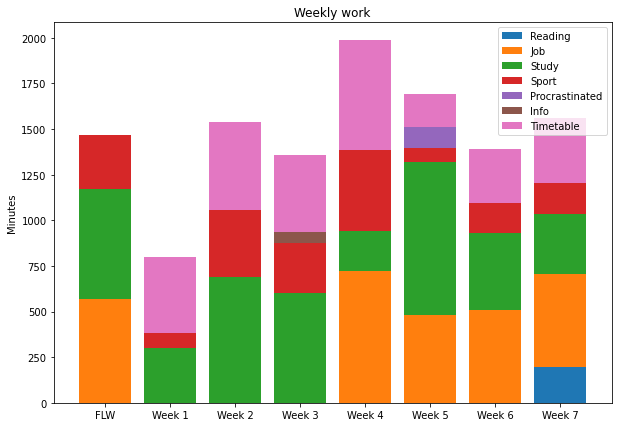

In [60]:
######
# WEEKLY BAR CHART
######

import numpy as np
import matplotlib.pyplot as plt
 
N = len(df.week.unique())
 
ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
labels = []
bottom = np.zeros(N)
categories = df.loc[df.category != "Social"].category.unique()

totals = df \
    .loc[df.week != "Before"] \
    .loc[df.category != "Social"] \
    .groupby(['category','week'])["duration_mins"].sum().unstack(fill_value=0).stack()

for c in categories:
    p = plt.bar(ind, totals[c], bottom = bottom, label=c)
    bottom += totals[c]
    labels.append([p[0],c])
 
plt.ylabel('Minutes')
plt.title('Weekly work')
plt.xticks(ind, totals['Study'].keys())

plt.legend()
plt.show()

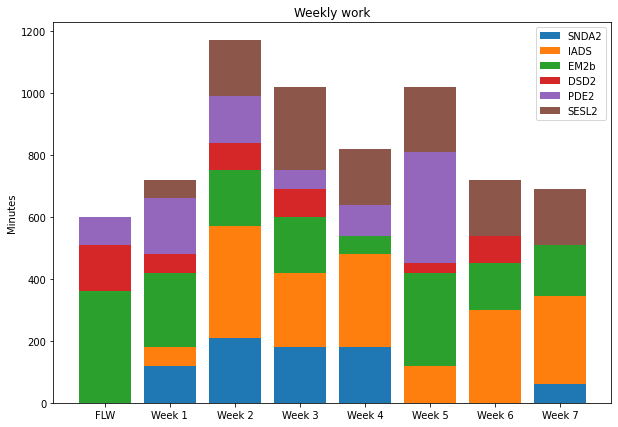

In [61]:
######
# Time per Subject per Week
######

import numpy as np
import matplotlib.pyplot as plt

N = len(df.week.unique())
 
ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
labels = []
bottom = np.zeros(N)

totals = df.loc[df.subject.notna()].groupby(['subject','week'])["duration_mins"].sum().unstack(fill_value=0).stack()
subjects = df.loc[df.subject.notna()].subject.unique()
for s in subjects:
    p = plt.bar(ind, totals[s], bottom = bottom, label=s)
    bottom += totals[s]
    labels.append([p[0],s])
 
plt.ylabel('Minutes')
plt.title('Weekly work')
plt.xticks(ind, totals['DSD2'].keys())

plt.legend()
plt.show()


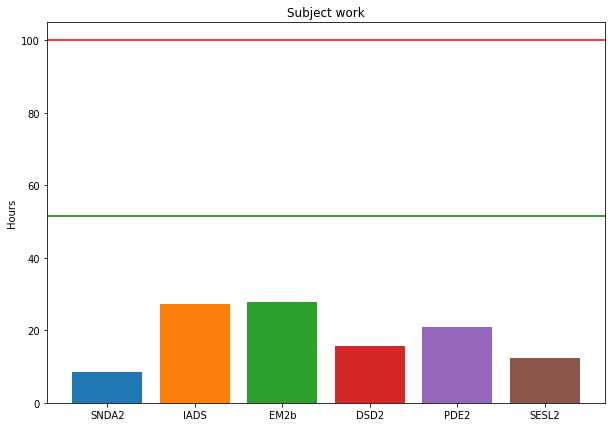

In [62]:
######
# Time per Subject
######

import numpy as np
import matplotlib.pyplot as plt

subjects = df.loc[df.subject.notna()].subject.unique()
N = len(subjects)
 
ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
labels = []
bottom = np.zeros(N)

totals = df.loc[df.subject.notna()].groupby(['subject'])["duration_hours"].sum()

p = plt.bar(ind, totals, color=plt.get_cmap("tab10")(range(N)))
 
plt.ylabel('Hours')
plt.title('Subject work')
plt.xticks(ind, subjects)

plt.axhline(100, color='red')
today = datetime.now().timetuple().tm_yday
exam_date = datetime(2022,5,1).timetuple().tm_yday
start_date = datetime(2022,1,16).timetuple().tm_yday 
way_through_sem = (today-start_date)/(exam_date-start_date)
plt.axhline(100*way_through_sem, color='green')
# plt.legend()
plt.show()
